In [1]:
import tensorflow  as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as IMAGE
from tensorflow import keras
from sklearn import metrics

In [2]:
names_flowers=['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [3]:
img_pix=224
new_model = tf.keras.models.load_model('saved_model2/my_model11_-2/12/21')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d (AverageP  (None, 224, 224, 3)      0         
 ooling2D)                                                       
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 54, 54, 32)       0         
 ePooling2D)                                                     
                                                      

In [4]:
import os 
images=[]
path='FLOWERS_CLASSIFICATIOn'
for img in os.listdir(path):
    img =keras.utils.load_img((os.path.join(path,img)), target_size=(img_pix, img_pix))
    images.append(img)
    
    

In [5]:
names_predictions=[]
for i in range(len(images)):
    img_arr = tf.expand_dims(images[i], 0)
    predictions_neuron = new_model.predict(img_arr)
    prediction_score=tf.nn.softmax(predictions_neuron[0])
    name_index=np.argmax(predictions_neuron[0])
    names_predictions.append((names_flowers[name_index]))

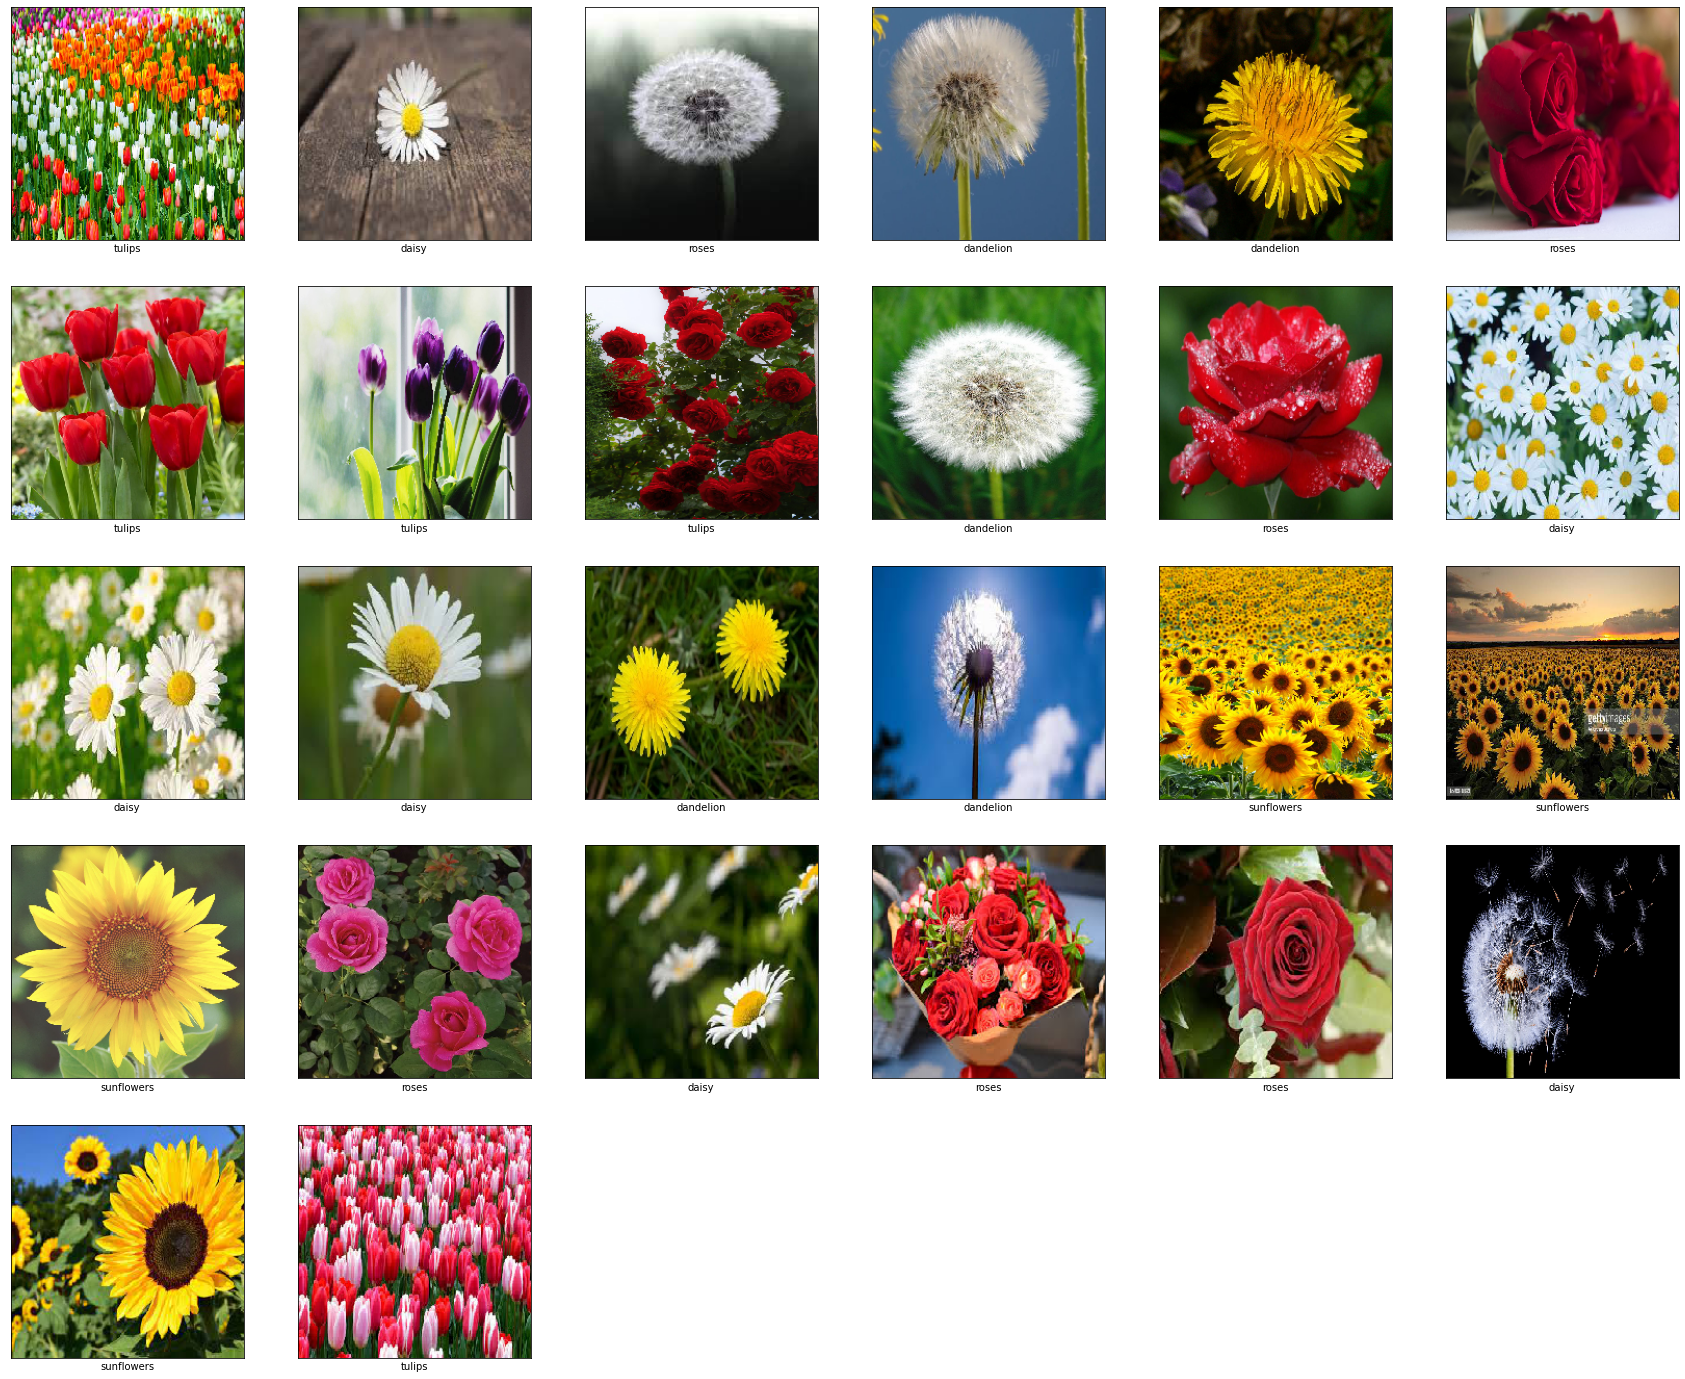

In [6]:
plt.figure(figsize=(30,30))
y_predicted=[]
for i in range(len(images)):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(names_predictions[i])
    plt.imshow(images[i])
    y_predicted.append(names_predictions[i])
plt.show()

# Visualize each layers (Convolutional,Pooling layers)

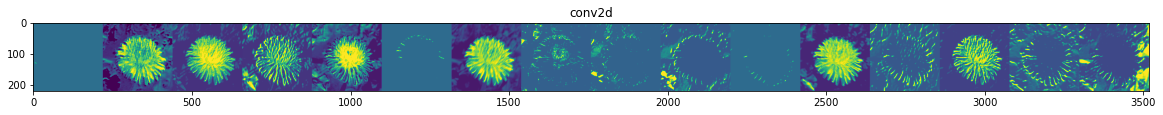

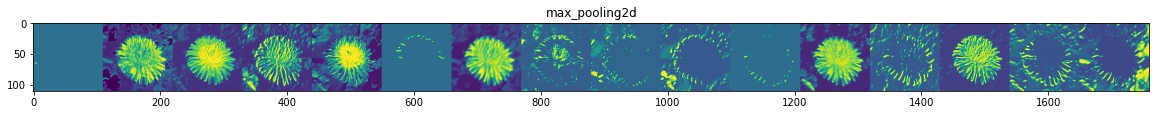

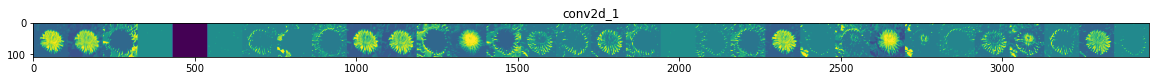

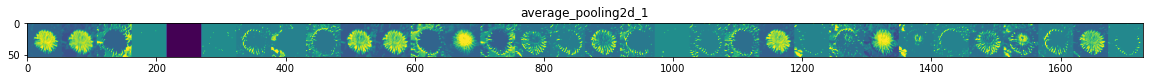

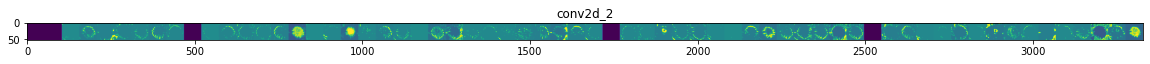

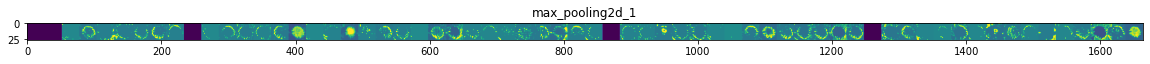

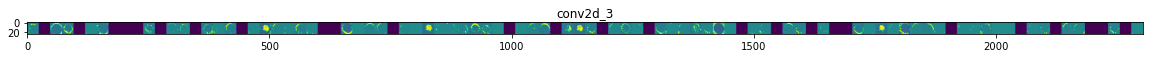

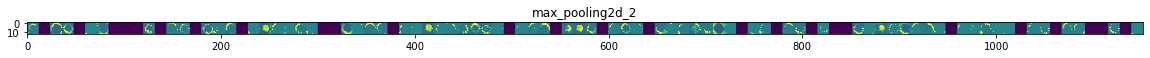

In [7]:

import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
np.seterr(divide='ignore', invalid='ignore')

successive_outputs = [layer.output for layer in new_model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = new_model.input, outputs = successive_outputs)

img = keras.utils.load_img(os.path.join(path,'1200px-DandelionFlower.jpg'),target_size=(img_pix, img_pix))

x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  


x /= 255
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in new_model.layers[1:]]



for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if (len(feature_map.shape) == 4):
   
        n_features = feature_map.shape[-1] 
   
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            display_grid[:, i * size : (i + 1) * size] = x

        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [8]:

y_actual=['tulips','daisy','dandelion','dandelion','dandelion','roses','tulips','tulips','roses','dandelion','roses','daisy','daisy','daisy','dandelion','dandelion','sunflowers','sunflowers','sunflowers','roses','daisy','roses','dandelion','roses','sunflowers','tulips',]
print(metrics.confusion_matrix(y_actual, y_predicted, labels=['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']))

[[5 0 0 0 2]
 [0 5 0 0 0]
 [0 0 4 0 0]
 [0 0 0 4 0]
 [0 1 1 0 4]]


In [9]:
print(metrics.classification_report(y_actual, y_predicted, labels=['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']))

              precision    recall  f1-score   support

   dandelion       1.00      0.71      0.83         7
       daisy       0.83      1.00      0.91         5
      tulips       0.80      1.00      0.89         4
  sunflowers       1.00      1.00      1.00         4
       roses       0.67      0.67      0.67         6

    accuracy                           0.85        26
   macro avg       0.86      0.88      0.86        26
weighted avg       0.86      0.85      0.84        26

